In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

FileNotFoundError: [Errno 2] No such file or directory: './world-development-indicators/Indicators.csv'

The dataset is has a lot of rows, but only 6 columns. So let's have a look at a sample of rows

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


So now we know why there are so many rows. For each country there are multiple Economic Indicators and each of that information is present in a row. 

In [6]:
countries = data['CountryName'].value_counts()

In [7]:
countries

Mexico                       37244
Colombia                     37227
Philippines                  36912
Peru                         36815
Costa Rica                   36457
                             ...  
Northern Mariana Islands      1942
Isle of Man                   1764
Curacao                       1564
Sint Maarten (Dutch part)      681
St. Martin (French part)       572
Name: CountryName, Length: 247, dtype: int64

So, there are 247 countries listed here. 

## How many indicators are there?

In [11]:
indicators = data['IndicatorName'].unique()

In [12]:
len(indicators)

1344

## For how many years do we have the data?

In [14]:
years = data['Year'].unique()

In [15]:
years

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

In [16]:
len(years)

56

## Let's explore CO2 emissions

In [19]:
hist_indicator = 'CO2 emissions (metric tons per capita)'
hist_country_code = 'USA'

indicator_query = data['IndicatorName'] == hist_indicator
country_code_query = data['CountryCode'] == hist_country_code


In [20]:
data_co = data[indicator_query & country_code_query]

In [22]:
len(data_co)

52

There should have been 56 items, because there are 56 years mentioned for somec countries, but we only have 52, meaning the data isn't available for 4 years.

In [24]:
data_co.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


### Let's see how emissoins have changed over the years

In [50]:
hist_indicator = 'CO2 emissions (metric tons per capita)'
hist_year = 2011
query_indicator =  data['IndicatorName']==hist_indicator
query_year = data['Year']==hist_year

In [51]:
data_em = data[query_indicator & query_year]

In [52]:
data_em.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [54]:
data_em[data_em['CountryCode'] == 'USA']

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5194727,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,17.020216


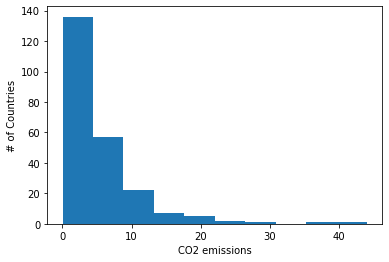

In [57]:
plt.hist(data_em['Value'])
plt.xlabel('CO2 emissions')
plt.ylabel('# of Countries')
plt.show()

### Identifying Relationships between 2 variables

#### Relationships between GDP CO2 Emissions

In [62]:
hist_indicator = 'GDP per capita (constant 2005 US$)'
hist_country = 'USA'

query_indicator = data['IndicatorName']==hist_indicator
query_country_code = data['CountryCode'] == hist_country_code

data_gdp = data[query_indicator & query_country_code]

In [63]:
data_gdp.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


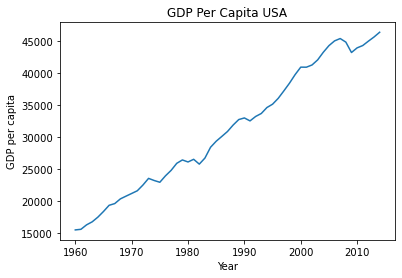

In [65]:
plt.plot(data_gdp['Year'].values, data_gdp['Value'].values)
plt.title('GDP Per Capita USA')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.show()

### Scatterplot to compare GDP vs CO2 emissions

In [77]:
print("GDP Min Year = ", data_gdp['Year'].min(), "max: ", data_gdp['Year'].max())
print("CO2 Min Year = ", data_co['Year'].min(), "max: ", data_co['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


In [78]:
data_gdp_trunc = data_gdp[data_gdp['Year'] < 2012]

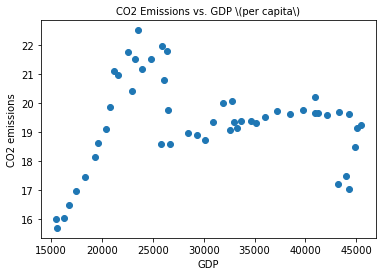

In [81]:
plt.scatter(data_gdp_trunc['Value'].values, data_co['Value'].values)
plt.title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
plt.xlabel('GDP')
plt.ylabel('CO2 emissions')
plt.show()